In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15494, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15494 (delta 0), reused 1 (delta 0), pack-reused 15490
Receiving objects: 100% (15494/15494), 14.11 MiB | 18.47 MiB/s, done.
Resolving deltas: 100% (10409/10409), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)


def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

' -11.jpg'
' -12.jpg'
' -14.jpg'
' -15.jpg'
' -16.jpg'
' -17.jpg'
' -1.jpg'
'2020-02-03 10.03.48 2.jpg'
' -2.jpg'
' -4.jpg'
' -5.jpg'
' -6.jpg'
' -7.jpg'
 8IlsfZO.jpg
' -8.jpg'
'Colab Notebooks'
'Delhi-Agra 2016'
'Document from Zayed Haque.pdf'
 DSC_0111-1.jpg
 DSC_0932Aa.jpg
':).gdoc'
'Google Keep Document.gdoc'
'Google Photos'
 image.jpg
'Integrated  MTech Data Science - Curriculum.pdf'
 Jetson.mp4
 NVIDIA-Jetson-AI-Specialist-Certificate-Zayed-Haque.pdf
 Photos
'Portfolio '
 RA2112704010001.docx
 RA2112704010001.gdoc
'Resume v2.0 (1).pdf'
'Scanned Documents'
 Screenshot_20221023-111815.jpg
 sg56IAQ.jpg
 train
 yolo_custom_model_Training
 yolo_scro
 Zayed


In [ ]:

!ls /mydrive/yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_custom.cfg


In [ ]:

!cp /mydrive/yolov3/obj.zip ../

In [ ]:

!unzip ../obj.zip -d data/

Archive:  ../obj.zip
 extracting: data/obj/_darknet.labels  
  inflating: data/obj/extracted_frames-frame0_jpg.rf.871ffbd5ddab8c50f6dcef157d4389c4.jpg  
  inflating: data/obj/extracted_frames-frame0_jpg.rf.871ffbd5ddab8c50f6dcef157d4389c4.txt  
  inflating: data/obj/extracted_frames-frame0_jpg.rf.bbf0929479d9739ea5056de933bbfc81.jpg  
  inflating: data/obj/extracted_frames-frame0_jpg.rf.bbf0929479d9739ea5056de933bbfc81.txt  
  inflating: data/obj/extracted_frames-frame0_jpg.rf.c28405daf51600d2e7d76c250e05ea53.jpg  
  inflating: data/obj/extracted_frames-frame0_jpg.rf.c28405daf51600d2e7d76c250e05ea53.txt  
  inflating: data/obj/extracted_frames-frame1_jpg.rf.1237721d28ad3f7bbe8b9479c05712d6.jpg  
  inflating: data/obj/extracted_frames-frame1_jpg.rf.1237721d28ad3f7bbe8b9479c05712d6.txt  
  inflating: data/obj/extracted_frames-frame1_jpg.rf.3039725803c393c81175ed61d7657a14.jpg  
  inflating: data/obj/extracted_frames-frame1_jpg.rf.3039725803c393c81175ed61d7657a14.txt  
  inflating: data/o

In [ ]:

!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom2.cfg

In [ ]:

download('cfg/yolov3.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

 

In [ ]:

!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data



In [ ]:

!cp /mydrive/yolov3/generate_train.py ./




In [ ]:
!python generate_train.py

In [ ]:

!ls data/

9k.tree      eagle.jpg		   imagenet.shortnames.list  openimages.names
coco9k.map   giraffe.jpg	   labels		     person.jpg
coco.names   goal.txt		   obj			     scream.jpg
custom_data  horses.jpg		   obj.data		     train.txt
dog.jpg      imagenet.labels.list  obj.names		     voc.names


In [ ]:

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.916803), count: 1, class_loss = 0.000055, iou_loss = 0.010197, total_loss = 0.010252 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 10757, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000017, iou_loss = 0.000000, total_loss = 0.000017 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.859268), count: 1, class_loss = 0.000203, iou_loss = 0.059942, total_loss = 0.060145 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 10758, rewritten_bbox = 0.000000 % 
v3 (mse

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortc

# Last


In [ ]:

%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

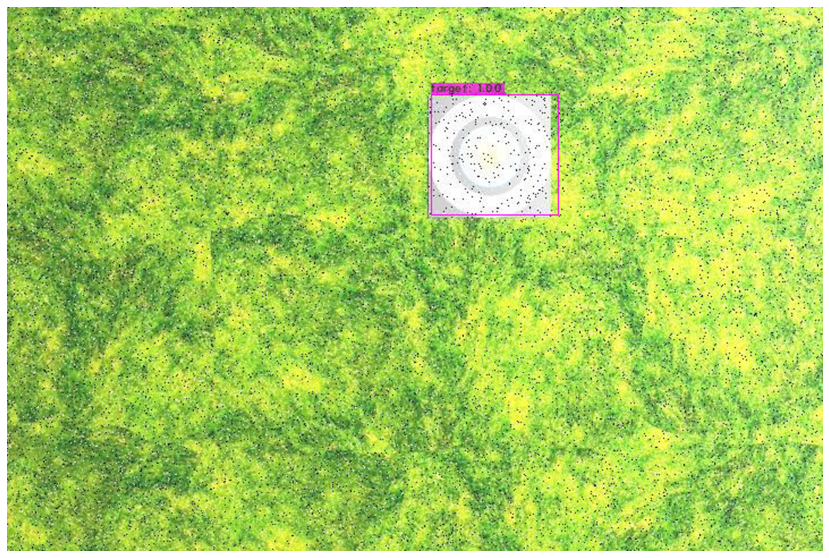

In [ ]:

!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/images/2.jpg -thresh 0.3
imShow('predictions.jpg')